In [5]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Cell 2: Load the Data (robust)
csv_path = os.path.join("..", "data", "processed", "documind_dataset.csv")

df = None
try:
    df = pd.read_csv(csv_path)
    print(f"✅ Data Loaded! Shape: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print("⏳ Data file not found yet. Run the data-creation script first.")
    # stop further execution in this notebook cell sequence
    raise SystemExit("Stopping: data file missing.")


✅ Data Loaded! Shape: (1792, 4)


,filename,category,split,text
0,0001477447.tif,email,train,Author: Linda Carter at Ba C2\nDate: 4/12/95 8...
1,0011834351.tif,email,train,BWINTERNAT LVL\n\n& A\n\ndabot\ncnsviink e29ua...
2,12503820.tif,email,train,ze20 BHOOL\nAAA\n\nTLX ONLY (62)82152519+\n“LA...
3,2063068635_8636.tif,email,train,"‘Sent Thuredey. March 02, 2000641 AM\nJo"" Varg..."
4,2063075814.tif,email,train,"SA _\n‘ato, San\nPrieto es\npar aod\nae\ncas,\..."


In [7]:
# Cell 3: sanity checks for required columns
required_cols = {"text", "category"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Required column(s) missing from dataframe: {missing}")

print("\n--- Missing Values ---")
print(df.isnull().sum())



--- Missing Values ---
filename    0
category    0
split       0
text        0
dtype: int64


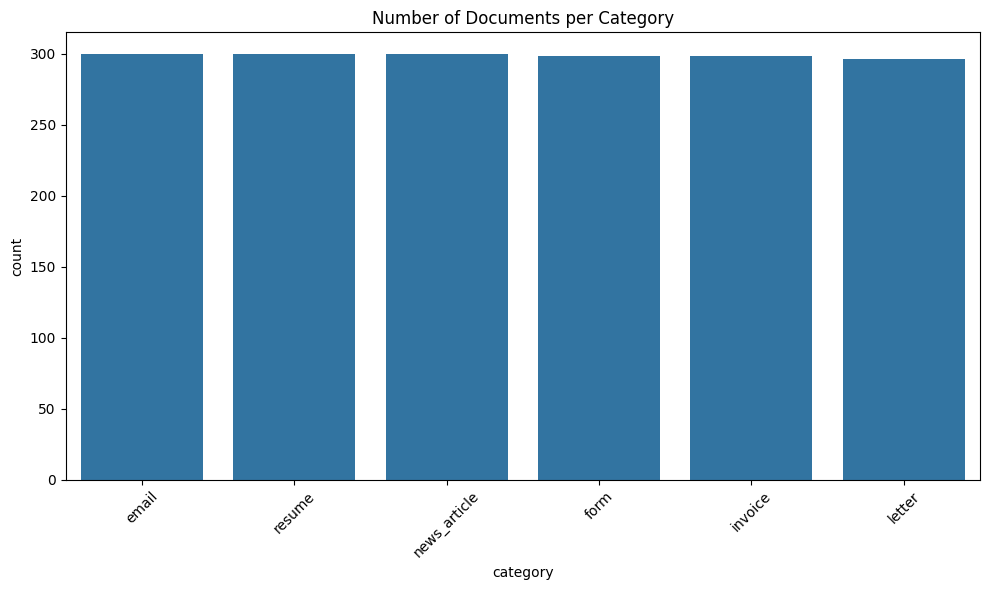

In [8]:
# Cell 4: Visualizing Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.title("Number of Documents per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


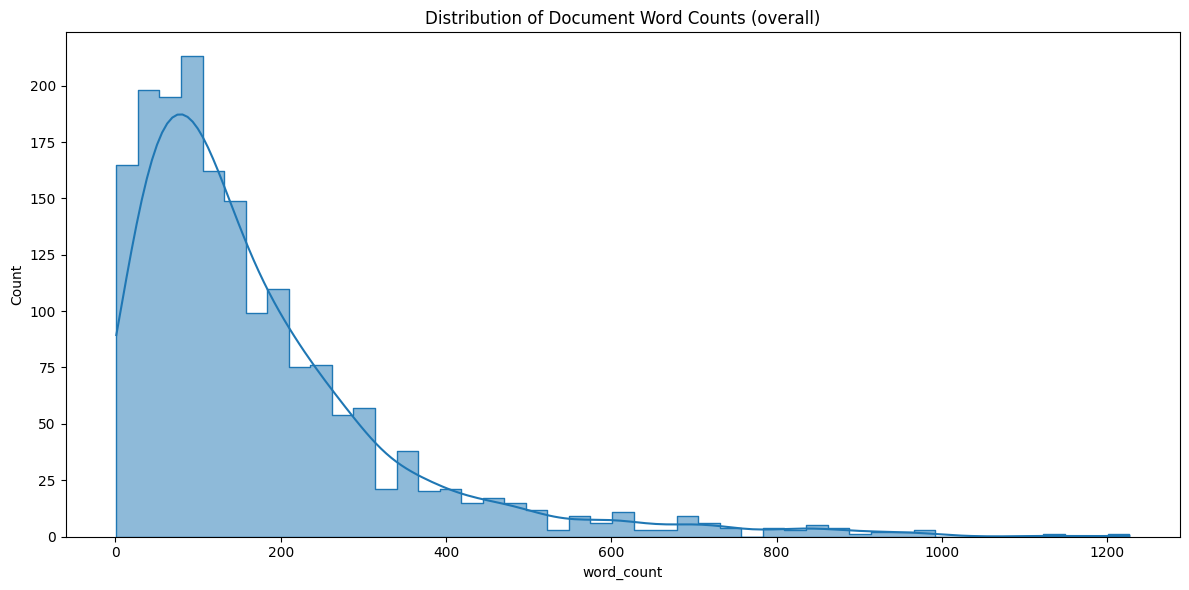

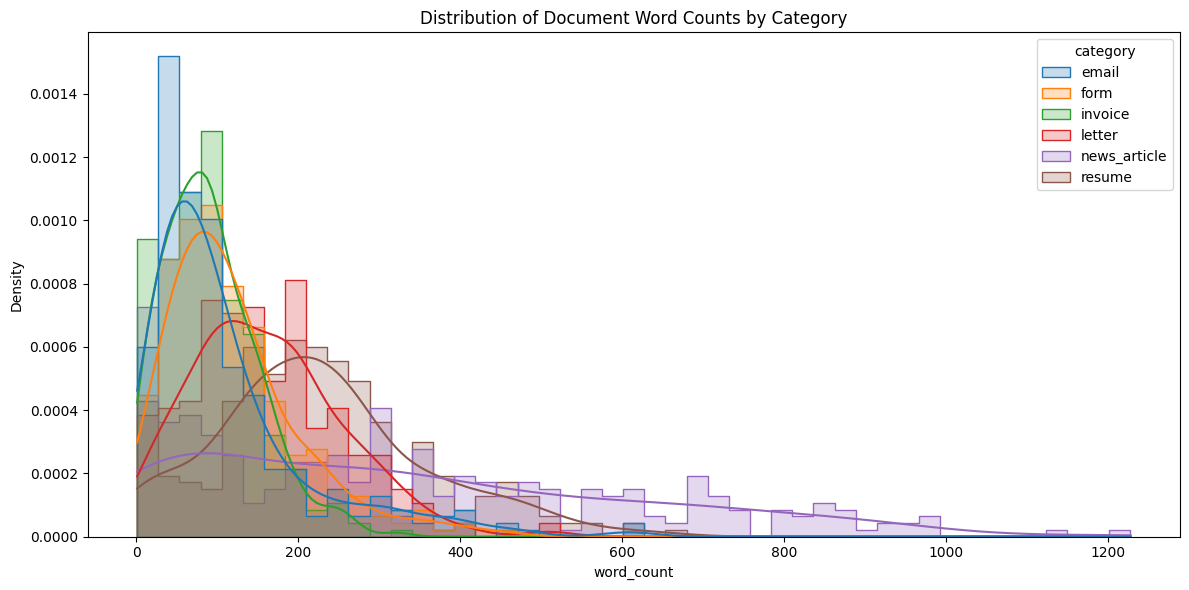

In [9]:
# Cell 5: Text Length Analysis (efficient & safe)
# ensure 'text' is string, compute word count
df['text'] = df['text'].astype(str)
df['word_count'] = df['text'].str.split().str.len()

# If too many categories, consider plotting per-category distributions separately or using FacetGrid
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_count', kde=True, element="step")  # overall distribution
plt.title("Distribution of Document Word Counts (overall)")
plt.tight_layout()
plt.show()

# Option: per-category overlaid distributions (works well if only a few categories)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_count', hue='category', kde=True, element="step", stat="density")
plt.title("Distribution of Document Word Counts by Category")
plt.tight_layout()
plt.show()
